<a href="https://colab.research.google.com/github/jagadeesan121/jagadeesan/blob/main/guviproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('train-chennai-sale.csv')

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

cleaning

In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [7]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)

In [8]:
df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean(),inplace=True)

In [9]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [10]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])

In [11]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

In [12]:
df['N_BEDROOM']=df['N_BEDROOM'].astype('int')

In [13]:
df['N_BATHROOM']=df['N_BATHROOM'].astype('int')

In [14]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [15]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [16]:
df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Velchery'],'Velachery',inplace=True)
df['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet',inplace=True)
df['AREA'].replace(['KKNagar'],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],'T Nagar',inplace=True)

In [17]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [18]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [19]:
df['SALE_COND'].replace(['Ab Normal'],'AbNormal',inplace=True)
df['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial',inplace=True)
df['SALE_COND'].replace(['Adj Land'],'AdjLand',inplace=True)


In [20]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [21]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [22]:
df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)

In [23]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [25]:
df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)
df['BUILDTYPE'].replace(['Other'],'Others',inplace=True)

In [26]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [27]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [28]:
df['UTILITY_AVAIL'].replace(['All Pub'],'AllPub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr '],'NoSeWa',inplace=True)

In [29]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

In [30]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [31]:
df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

In [32]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [33]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [34]:
df['AGE']=pd.DatetimeIndex(df['DATE_SALE']).year-pd.DatetimeIndex(df['DATE_BUILD']).year 

In [35]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
AGE                       int64
dtype: object

In [36]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,55.000000


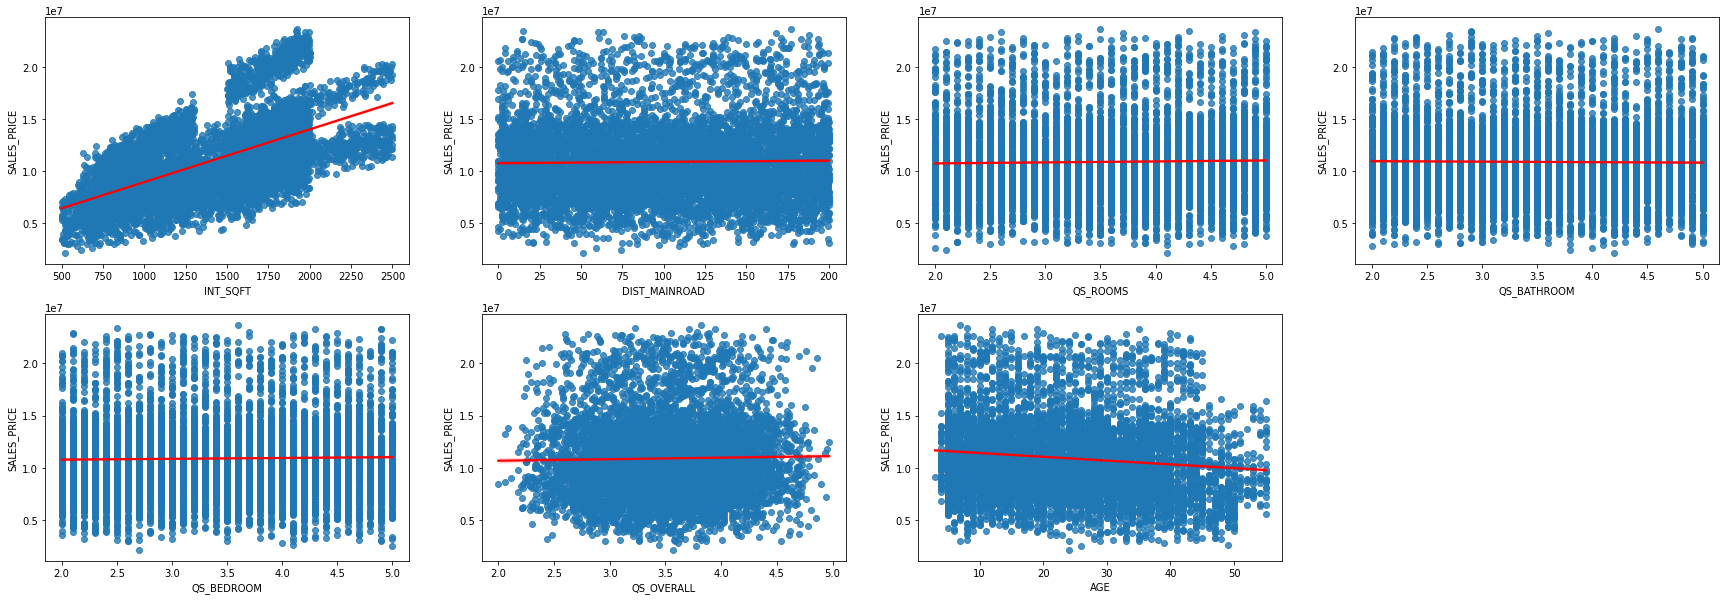

In [37]:
plt.figure(figsize=(30,10))
plt.subplot(2,4,1)
sns.regplot(x=df['INT_SQFT'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.subplot(2,4,2)
sns.regplot(x=df['DIST_MAINROAD'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.subplot(2,4,3)
sns.regplot(x=df['QS_ROOMS'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.subplot(2,4,4)
sns.regplot(x=df['QS_BATHROOM'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.subplot(2,4,5)
sns.regplot(x=df['QS_BEDROOM'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.subplot(2,4,6)
sns.regplot(x=df['QS_OVERALL'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.subplot(2,4,7)
sns.regplot(x=df['AGE'],y=df['SALES_PRICE'],line_kws={'color':'red'})


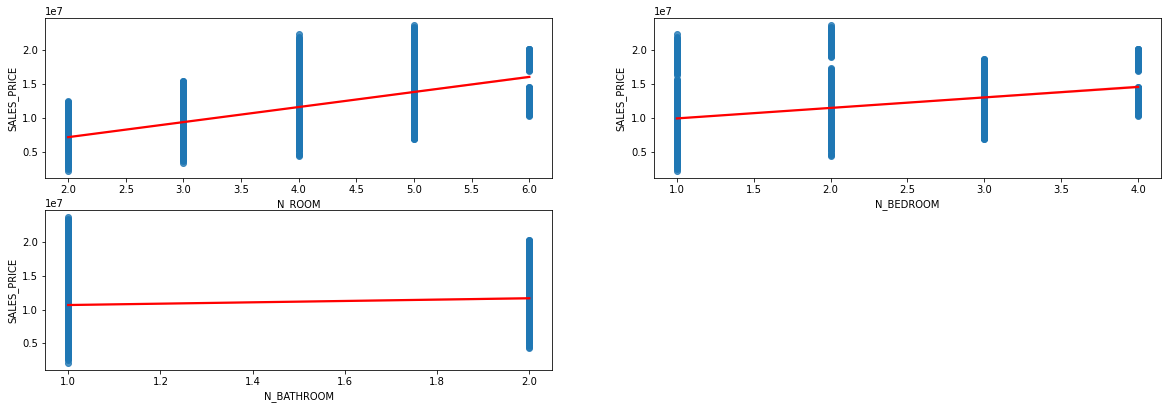

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.regplot(x=df['N_ROOM'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.subplot(3,2,2)
sns.regplot(x=df['N_BEDROOM'],y=df['SALES_PRICE'],line_kws={'color':'red'})
plt.subplot(3,2,3)
sns.regplot(x=df['N_BATHROOM'],y=df['SALES_PRICE'],line_kws={'color':'red'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


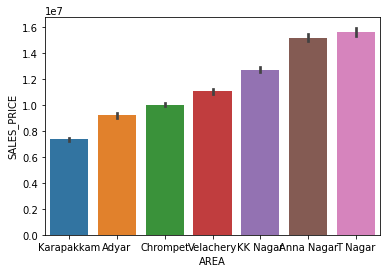

In [39]:
sns.barplot(df.AREA,df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


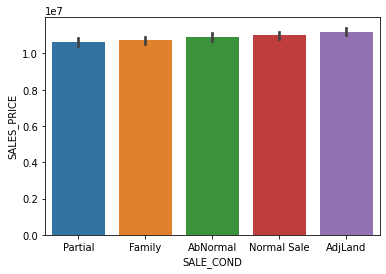

In [40]:
sns.barplot(df.SALE_COND,df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


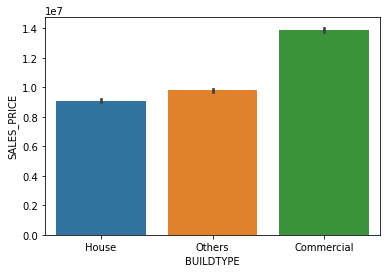

In [41]:
sns.barplot(df.BUILDTYPE,df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


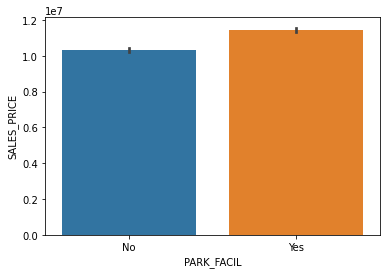

In [42]:
sns.barplot(df.PARK_FACIL,df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


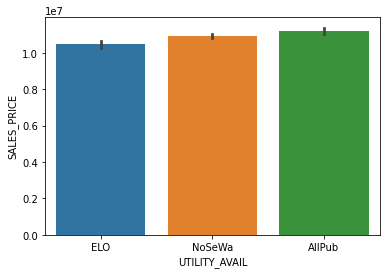

In [43]:
sns.barplot(df.UTILITY_AVAIL,df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


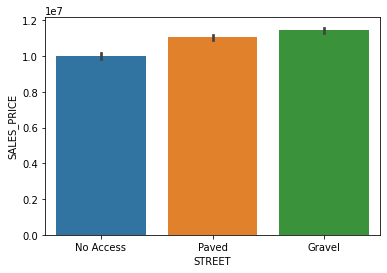

In [44]:
sns.barplot(df.STREET,df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


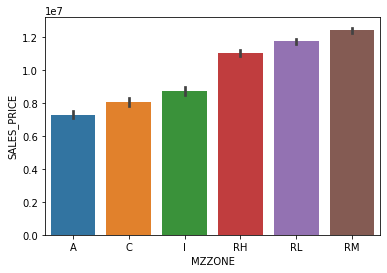

In [45]:
sns.barplot(df.MZZONE,df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

In [46]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())



['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Others' 'House']
['AllPub' 'ELO' 'NoSeWa']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [47]:
df.AREA=df.AREA.map({'Karapakkam':0,'Anna Nagar':5,'Adyar':1,'Velachery':3,'Chrompet':2,'KK Nagar':4,'T Nagar':6})

In [48]:
df.SALE_COND=df.SALE_COND.map({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})

In [49]:
df.PARK_FACIL=df.PARK_FACIL.map({'No':0,'Yes':1})

In [50]:
df.BUILDTYPE=df.BUILDTYPE.map({'House':0,'Others':1,'Commercial':2})

In [51]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.map({'AllPub':2,'ELO':0,'NoSeWa':1})

In [52]:
df.STREET=df.STREET.map({'Paved':1,'Gravel':2,'No Access':0})

In [53]:
df.MZZONE=df.MZZONE.map({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5})

In [54]:
df.dtypes

PRT_ID                   object
AREA                      int64
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                 int64
PARK_FACIL                int64
DATE_BUILD       datetime64[ns]
BUILDTYPE                 int64
UTILITY_AVAIL             int64
STREET                    int64
MZZONE                    int64
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
AGE                       int64
dtype: object

In [55]:
df.drop(['PRT_ID','DATE_SALE','DIST_MAINROAD','DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS'],axis=1,inplace=True)

In [56]:
df.dtypes

AREA             int64
INT_SQFT         int64
N_BEDROOM        int64
N_BATHROOM       int64
N_ROOM           int64
SALE_COND        int64
PARK_FACIL       int64
BUILDTYPE        int64
UTILITY_AVAIL    int64
STREET           int64
MZZONE           int64
SALES_PRICE      int64
AGE              int64
dtype: object

In [57]:
x=df.drop('SALES_PRICE',axis=1).values
y=df['SALES_PRICE'].values

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [59]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(x_train,y_train) 
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test) 

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = regressor.predict(x_test)

In [62]:
from sklearn import metrics
print('R2-score',metrics.r2_score(y_test,y_pred))

R2-score 0.8772740121817877


In [63]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [64]:
y_pred=regressor.predict(x_test)

In [65]:
from sklearn import metrics
print('R2-score',metrics.r2_score(y_test,y_pred))

R2-score 0.9739457941611801


In [73]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
from sklearn import metrics
print("R2-score",metrics.r2_score(y_test,y_pred))


[13:07:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2-score 0.9910147864867912
